# Protection numérique des sources journalistiques : l'artiste responsable

## 1. Import des librairies pour la réalisation des tests

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
sns.set(color_codes=True, font_scale=1.3)
plt.rcParams["figure.figsize"] = [12,12]

## 2. Initialisation des fonctions

In [2]:
# Régression linéaire multiple 
def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

# p-values de la corrélation de Pearson
def pvalues_pearson(df):
    df = df._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            if c == r:
                df_corr = df[[r]].dropna()
            else:
                df_corr = df[[r,c]].dropna()
            pvalues[r][c] = scipy.stats.pearsonr(df_corr[r], df_corr[c])[1]
    return pvalues

# p-values de la corrélation de Spearman
def pvalues_spearman(df):
    df = df._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            if c == r:
                df_corr = df[[r]].dropna()
            else:
                df_corr = df[[r,c]].dropna()
            pvalues[r][c] = scipy.stats.spearmanr(df_corr[r], df_corr[c])[1]
    return pvalues

## 3. Import des données et création des variables

In [3]:
datas = pd.read_csv("C:/datas.csv", delimiter=";")

# Variable dépendante = mise en œuvre d’une protection numérique des source
VD1 = datas[['MEOAttentionSecurite', 'MEOUtiliseOutils', 'MEOSecuriseAcces', 'MEOSensibiliseSources', 'MEOProtectionEquivalente', 'MEODestructionSecure']]
VD1Median = VD1.median(axis=1)

# Variable contextuelle 1 = intérêt
VCont1 = datas[['percUtilite', 'percBenefice', 'percImportance', 'percMeConcerne']]
VCont1Median = VCont1.median(axis=1)

# Variable contextuelle 2 = connaissances subjectives
VCont2 = datas[['nivConnaiPercueAmis', 'nivConnaiPercueJournalistes', 'nivConnaiPercueExperts']]
VCont2Median = VCont2.median(axis=1)

#### Hypothèse H1 ####
#### Hypothèses explicatives H1.1 H2.2 H3.3 ####

# Variable indépendante VI1.1 = niveau de menaces subjectives
VI1_1 = datas[['percMenaceCyber', 'percMenaceSocialInge', 'percMenaceEcoute', 'percMenaceCambriolage', 'percMenacePoursuites']]
VI1_1Median = VI1_1.median(axis=1)

# Variable indépendante VI1.2 = niveau de conséquences subjectives
VI1_2 = datas[['percConsequenceImageEntr', 'percConsequenceImageJourn', 'percConsequenceIntegrite', 'percConsequenceLicenciement', 'percConsequencePrison']]
VI1_2Median = VI1_2.median(axis=1)

# Variable indépendante VI1.3 = cours dédiés suivi dans la formation journalistique
VI1_3 = datas[['suiviCoursSuivi', 'suiviCoursPropose', 'suiviCoursEntendu']]
VI1_3Median = VI1_3.median(axis=1)

# Variable indépendante VI1 = niveau de sensibilisation
VI1 = pd.concat([VI1_1Median, VI1_2Median, VI1_3Median], axis=1)
VI1Median = VI1.median(axis=1)

#### Hypothèse H2 ####
#### Hypothèses explicatives H2.1 H2.2 H2.3 ####

# Variable indépendante VI2.1 = supports dédiés
VI2_1 = datas[['MEPProcess', 'MEPProcessUtilite']]
VI2_1Median = VI2_1.median(axis=1)

# Variable indépendante VI2.2 = outils dédiés
VI2_2 = datas[['MEPOutils', 'MEPOutilsUtilite']]
VI2_2Median = VI2_2.median(axis=1)

# Variable indépendante VI2.2 = formation continue dédiée
VI2_3 = datas[['suiviCoursEntrepriseSuivi', 'suiviCoursEntreprisePropose', 'suiviCoursEntrepriseEntendu']]
VI2_3Median = VI2_3.median(axis=1)

# Variable indépendante VI2 = niveau de soutien opérationnel
VI2 = pd.concat([VI2_1Median, VI2_2Median, VI2_3Median], axis=1)
VI2Median = VI2.median(axis=1)

## 4. Vérification du modèle conceptuel

### 4.1 Corrélation multifacteurs

,Mise en oeuvre,Intérêt,Connaissances,Sensibilisation,Menaces,Conséquences,Cours en formation,Soutien opérationnel,Supports,Outils,Formation continue
Mise en oeuvre,1.00*,0.38*,0.58*,0.54*,0.52*,0.35*,0.33*,0.26*,0.20,0.43*,0.19
Intérêt,0.38*,1.00*,0.20,0.23,0.18,0.10,0.28*,0.02,0.09,-0.02,-0.05
Connaissances,0.58*,0.20,1.00*,0.53*,0.34*,0.27*,0.42*,0.05,0.00,0.18,-0.02
Sensibilisation,0.54*,0.23,0.53*,1.00*,0.57*,0.65*,0.40*,0.03,0.06,0.09,0.07
Menaces,0.52*,0.18,0.34*,0.57*,1.00*,0.21,-0.11,-0.10,-0.12,0.35*,-0.07
Conséquences,0.35*,0.10,0.27*,0.65*,0.21,1.00*,0.07,0.10,0.04,0.03,0.04
Cours en formation,0.33*,0.28*,0.42*,0.40*,-0.11,0.07,1.00*,0.03,0.18,0.04,0.05
Soutien opérationnel,0.26*,0.02,0.05,0.03,-0.10,0.10,0.03,1.00*,0.82*,0.49*,0.69*
Supports,0.20,0.09,0.00,0.06,-0.12,0.04,0.18,0.82*,1.00*,0.35*,0.53*
Outils,0.43*,-0.02,0.18,0.09,0.35*,0.03,0.04,0.49*,0.35*,1.00*,0.29*


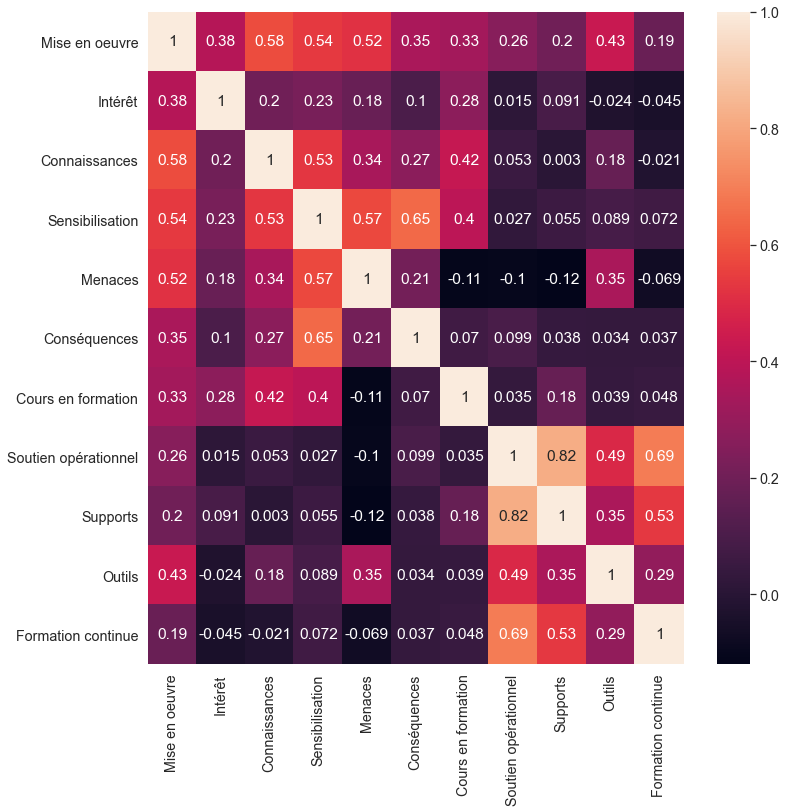

In [4]:
# Concaténation variable dépendante et facteurs explicatifs
facteurs = pd.concat([VD1Median, VCont1Median, VCont2Median, VI1Median, VI1_1Median, VI1_2Median, VI1_3Median, VI2Median, VI2_1Median, VI2_2Median, VI2_3Median], axis=1)
facteurs.columns = ["Mise en oeuvre", "Intérêt", "Connaissances", "Sensibilisation", "Menaces", "Conséquences", "Cours en formation", "Soutien opérationnel", "Supports", "Outils", "Formation continue"]

# Calcul de la significativité
pval = pvalues_pearson(facteurs)

# Calcul du Coefficient de corrélation de Pearson
rho = facteurs.corr(method='pearson')

# Affichage sur un graphe
sns.heatmap(data=rho, annot=True, color="black")

# Représentation des p-values
r1 = rho.applymap(lambda x: '{:.2f}'.format(x))
r2 = rho.applymap(lambda x: '{:.2f}*'.format(x))
rho = rho.mask(pval>0.05,r1)
rho = rho.mask(pval<=0.05,r2)
rho

### 4.2 Impact de l'intérêt sur la mise en œuvre d’une protection numérique des sources

Significativité = 0.0036767


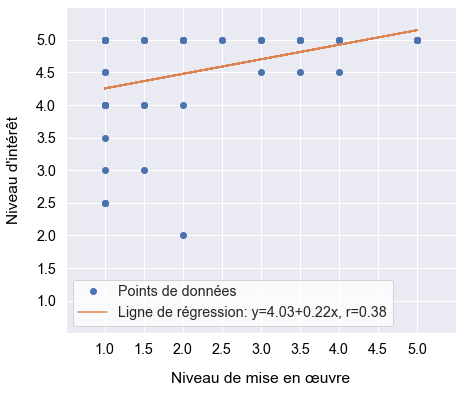

In [5]:
x = VD1Median
y = VCont1Median

# Régression linéaire
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Ligne de régression: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

# Affiche la significativité
print("Significativité =", round(p, 7))

# Affichage du graphe
fig, ax = plt.subplots(figsize = (7,6))
ax.plot(x, y, linewidth=0, marker='o', label='Points de données')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('Niveau de mise en œuvre', color="black")
ax.set_ylabel('Niveau d\'intérêt', color="black")
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 15
ax.set_ylim(ymin=0.5, ymax=5.5)
ax.set_xlim(xmin=0.5, xmax=5.5)
ax.set_yticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.legend(facecolor='white')
ax.tick_params(labelcolor='black')
plt.show()

### 4.3 Impact de la connaissance subjective sur la mise en œuvre d’une protection numérique des sources

Significativité = 2.7e-06


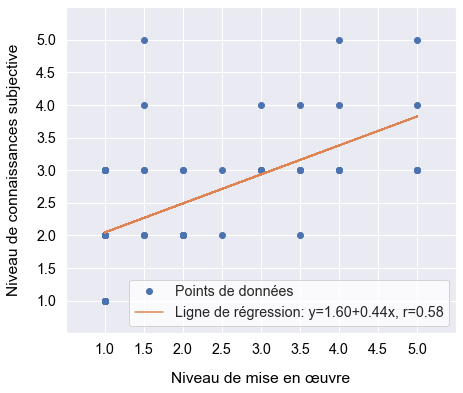

In [6]:
x = VD1Median
y = VCont2Median

# Régression linéaire
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Ligne de régression: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

# Affiche la significativité
print("Significativité =", round(p, 7))

# Affichage du graphe
fig, ax = plt.subplots(figsize = (7,6))
ax.plot(x, y, linewidth=0, marker='o', label='Points de données')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('Niveau de mise en œuvre', color="black")
ax.set_ylabel('Niveau de connaissances subjective', color="black")
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 15
ax.set_ylim(ymin=0.5, ymax=5.5)
ax.set_xlim(xmin=0.5, xmax=5.5)
ax.set_yticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.legend(facecolor='white')
ax.tick_params(labelcolor='black')
plt.show()

### 4.4 Impact du niveau de sensibilisation sur la mise en œuvre d’une protection numérique des sources (VI1.1, VI1.2, VI1.3 sur VD1)

In [7]:
x = np.concatenate([[VI1_1Median], [VI1_2Median], [VI1_3Median]])
y = VD1Median

# Régression linéaire multiple
res = reg_m(y, x)

# Affichage du résultat
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     15.04
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           3.59e-07
Time:                        21:04:30   Log-Likelihood:                -78.611
No. Observations:                  56   AIC:                             165.2
Df Residuals:                      52   BIC:                             173.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2972      0.082      3.637      0.0

#### 4.4.1 Impact du niveau de menaces subjectif sur la mise en œuvre d’une protection numérique des sources (VI1.1 sur VD1)

Significativité = 0.0007200449247130043


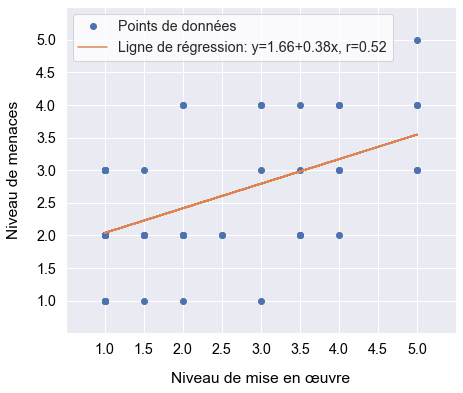

In [8]:
x = VD1Median
y = VI1_1Median
VD1VI1_1 = pd.concat([VD1Median, VI1_1Median], axis=1)

# Calcul de la significativité
pval = pvalues_spearman(VD1VI1_1)

# Régression linéaire
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Ligne de régression: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

# Affiche la significativité
print("Significativité =", pval[0][1])

# Affichage du graphe
fig, ax = plt.subplots(figsize = (7,6))
ax.plot(x, y, linewidth=0, marker='o', label='Points de données')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('Niveau de mise en œuvre', color="black")
ax.set_ylabel('Niveau de menaces', color="black")
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 15
ax.set_ylim(ymin=0.5, ymax=5.5)
ax.set_xlim(xmin=0.5, xmax=5.5)
ax.set_yticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.legend(facecolor='white')
ax.tick_params(labelcolor='black')
plt.show()

#### 4.4.2 Impact du niveau de conséquences subjectif sur la mise en œuvre d’une protection numérique des sources (VI1.2 sur VD1)

Significativité = 0.004759542274018582


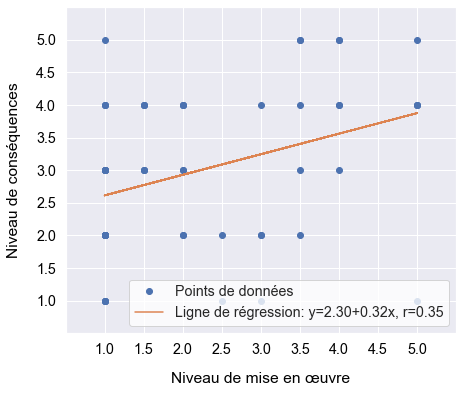

In [9]:
x = VD1Median
y = VI1_2Median
VD1VI1_2 = pd.concat([VD1Median, VI1_2Median], axis=1)

# Calcul de la significativité
pval = pvalues_spearman(VD1VI1_2)

# Régression linéaire
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Ligne de régression: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

# Affiche la significativité
print("Significativité =", pval[0][1])

# Affichage du graphe
fig, ax = plt.subplots(figsize = (7,6))
ax.plot(x, y, linewidth=0, marker='o', label='Points de données')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('Niveau de mise en œuvre', color="black")
ax.set_ylabel('Niveau de conséquences', color="black")
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 15
ax.set_ylim(ymin=0.5, ymax=5.5)
ax.set_xlim(xmin=0.5, xmax=5.5)
ax.set_yticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.legend(facecolor='white')
ax.tick_params(labelcolor='black')
plt.show()

#### 4.4.3 Impact de l’absence de cours dédiés dans la formation journalistique sur la mise en œuvre d’une protection numérique des sources (VI1.3 sur VD1)

Significativité = 0.0121436


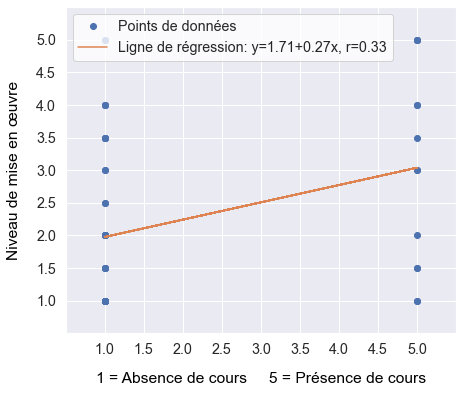

In [10]:
x = VI1_3Median
y = VD1Median

# Régression linéaire
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Ligne de régression: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

# Affiche la significativité
print("Significativité =", round(p, 7))

# Affichage du graphe
fig, ax = plt.subplots(figsize = (7,6))
ax.plot(x, y, linewidth=0, marker='o', label='Points de données')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('1 = Absence de cours     5 = Présence de cours', color="black")
ax.set_ylabel('Niveau de mise en œuvre', color="black")
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 15
ax.set_ylim(ymin=0.5, ymax=5.5)
ax.set_xlim(xmin=0.5, xmax=5.5)
ax.set_yticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.legend(facecolor='white')
plt.show()

### 4.5 Impact du niveau de soutien opérationnel sur la mise en œuvre d’une protection numérique des sources (VI2.1, VI2.2, VI2.3 sur VD1)

In [11]:
x = np.concatenate([[VI2_1Median], [VI2_2Median], [VI2_3Median]])
y = VD1Median

# Régression linéaire multiple
res = reg_m(y, x)

# Affichage du résultat
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     4.119
Date:                Thu, 10 Dec 2020   Prob (F-statistic):             0.0107
Time:                        21:04:30   Log-Likelihood:                -90.131
No. Observations:                  56   AIC:                             188.3
Df Residuals:                      52   BIC:                             196.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0432      0.126      0.344      0.7

#### 4.5.1 Impact de l’absence de supports sur la mise en œuvre d’une protection numérique des sources (VI2.1 sur VD1)

Significativité = 0.1353188


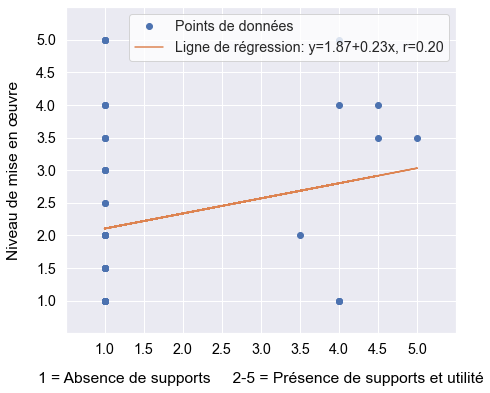

In [12]:
x = VI2_1Median
y = VD1Median

# Régression linéaire
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Ligne de régression: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

# Affiche la significativité
print("Significativité =", round(p, 7))

# Affichage du graphe
fig, ax = plt.subplots(figsize = (7,6))
ax.plot(x, y, linewidth=0, marker='o', label='Points de données')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('1 = Absence de supports     2-5 = Présence de supports et utilité', color="black")
ax.set_ylabel('Niveau de mise en œuvre', color="black")
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 15
ax.set_ylim(ymin=0.5, ymax=5.5)
ax.set_xlim(xmin=0.5, xmax=5.5)
ax.set_yticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.legend(facecolor='white')
ax.tick_params(labelcolor='black')
plt.show()

#### 4.5.2 Impact de l’absence d’outils sur la mise en œuvre d’une protection numérique des sources (VI2.2 sur VD1)

Significativité = 0.0008607


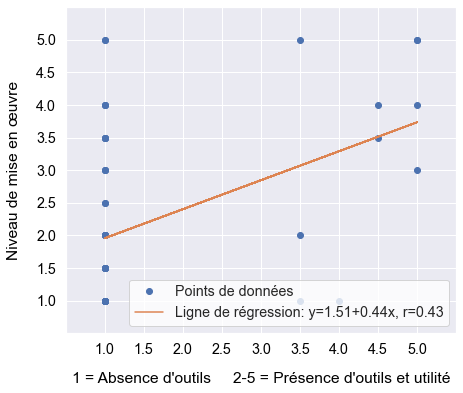

In [13]:
x = VI2_2Median
y = VD1Median

# Régression linéaire
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Ligne de régression: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

# Affiche la significativité
print("Significativité =", round(p, 7))

# Affichage du graphe
fig, ax = plt.subplots(figsize = (7,6))
ax.plot(x, y, linewidth=0, marker='o', label='Points de données')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('1 = Absence d\'outils     2-5 = Présence d\'outils et utilité', color="black")
ax.set_ylabel('Niveau de mise en œuvre', color="black")
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 15
ax.set_ylim(ymin=0.5, ymax=5.5)
ax.set_xlim(xmin=0.5, xmax=5.5)
ax.set_yticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.legend(facecolor='white')
ax.tick_params(labelcolor='black')
plt.show()

#### 4.5.3 Impact de l’absence de formation continue sur la mise en œuvre d’une protection numérique des sources (VI2.3 sur VD1)

Significativité = 0.1719038


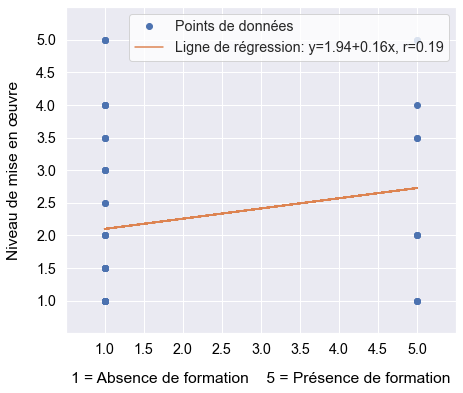

In [14]:
x = VI2_3Median
y = VD1Median

# Régression linéaire
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Ligne de régression: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

# Affiche la significativité
print("Significativité =", round(p, 7))

# Affichage du graphe
fig, ax = plt.subplots(figsize = (7,6))
ax.plot(x, y, linewidth=0, marker='o', label='Points de données')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('1 = Absence de formation    5 = Présence de formation', color="black")
ax.set_ylabel('Niveau de mise en œuvre', color="black")
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 15
ax.set_ylim(ymin=0.5, ymax=5.5)
ax.set_xlim(xmin=0.5, xmax=5.5)
ax.set_yticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.legend(facecolor='white')
ax.tick_params(labelcolor='black')
plt.show()

## 5 Discussion

### 5.1 Comparaison de l'intéret entre 2 groupes de journalistes : ceux ayant suivi des cours dédiés durant leur formation et les autres

In [15]:
datasSuiviCours = datas[datas.suiviCoursSuivi == 5]
datasSuiviCoursMedian = datasSuiviCours[['percUtilite', 'percBenefice', 'percImportance', 'percMeConcerne']].median(axis=1)

datasPasSuiviCours = datas[datas.suiviCoursSuivi == 1]
datasPasSuiviCoursMedian = datasPasSuiviCours[['percUtilite', 'percBenefice', 'percImportance', 'percMeConcerne']].median(axis=1)

interetMoyenSuiviCours = datasSuiviCoursMedian.mean()
interetMoyenPasSuiviCours = datasPasSuiviCoursMedian.mean()

print("Moyenne de l'intérêt de ceux qui ont suivi des cours =", interetMoyenSuiviCours)
print("Moyenne de l'intérêt de ceux qui n'ont pas suivi de cours =", interetMoyenPasSuiviCours)
print("Différence entre les deux groupes =", interetMoyenSuiviCours - interetMoyenPasSuiviCours)

Moyenne de l'intérêt de ceux qui ont suivi des cours =  4.916666666666667
Moyenne de l'intérêt de ceux qui n'ont pas suivi de cours =  4.420454545454546
Différence entre les deux groupes =  0.4962121212121211


### 5.2 Comparaison des facteurs entre 2 groupes de journalistes : ceux ayant des connaissances supérieures à la moyenne et les autres

In [16]:
# Calcul de la moyenne des connaissances subjectives
moyConnaissances = VCont2Median.mean()

datasConnaiSuppMoyenne = datas[datas[['nivConnaiPercueAmis', 'nivConnaiPercueJournalistes', 'nivConnaiPercueExperts']].median(axis=1) > moyConnaissances]
datasConnaiSuppMoyenneMedian =  datasConnaiSuppMoyenne[['nivConnaiPercueAmis', 'nivConnaiPercueJournalistes', 'nivConnaiPercueExperts']].median(axis=1)

datasConnaiInfMoyenne = datas[datas[['nivConnaiPercueAmis', 'nivConnaiPercueJournalistes', 'nivConnaiPercueExperts']].median(axis=1) < moyConnaissances]
datasConnaiInfMoyenneMedian = datasConnaiInfMoyenne[['nivConnaiPercueAmis', 'nivConnaiPercueJournalistes', 'nivConnaiPercueExperts']].median(axis=1)

VI1_1ConnaiSuppMoyenneMedian = datasConnaiSuppMoyenne[['percMenaceCyber', 'percMenaceSocialInge', 'percMenaceEcoute', 'percMenaceCambriolage', 'percMenacePoursuites']].median(axis=1)
VI1_1ConnaiInfMoyenneMedian = datasConnaiInfMoyenne[['percMenaceCyber', 'percMenaceSocialInge', 'percMenaceEcoute', 'percMenaceCambriolage', 'percMenacePoursuites']].median(axis=1)

VI1_2ConnaiSuppMoyenneMedian = datasConnaiSuppMoyenne[['percConsequenceImageEntr', 'percConsequenceImageJourn', 'percConsequenceIntegrite', 'percConsequenceLicenciement', 'percConsequencePrison']].median(axis=1)
VI1_2ConnaiInfMoyenneMedian = datasConnaiInfMoyenne[['percConsequenceImageEntr', 'percConsequenceImageJourn', 'percConsequenceIntegrite', 'percConsequenceLicenciement', 'percConsequencePrison']].median(axis=1)

VI1_3ConnaiSuppMoyenneMedian = datasConnaiSuppMoyenne[['suiviCoursSuivi', 'suiviCoursPropose', 'suiviCoursEntendu']].median(axis=1)
VI1_3ConnaiInfMoyenneMedian = datasConnaiInfMoyenne[['suiviCoursSuivi', 'suiviCoursPropose', 'suiviCoursEntendu']].median(axis=1)

VD1ConnaiSuppMoyenneMedian = datasConnaiSuppMoyenne[['MEOAttentionSecurite', 'MEOUtiliseOutils', 'MEOSecuriseAcces', 'MEOSensibiliseSources', 'MEOProtectionEquivalente', 'MEODestructionSecure']].median(axis=1)
VD1ConnaiInfMoyenneMedian = datasConnaiInfMoyenne[['MEOAttentionSecurite', 'MEOUtiliseOutils', 'MEOSecuriseAcces', 'MEOSensibiliseSources', 'MEOProtectionEquivalente', 'MEODestructionSecure']].median(axis=1)

moyVD1ConnaiSuppMoyenne = VD1ConnaiSuppMoyenneMedian.mean()
moyVD1ConnaiInfMoyenne = VD1ConnaiInfMoyenneMedian.mean()

moyVI1_1ConnaiSuppMoyenne = VI1_1ConnaiSuppMoyenneMedian.mean()
moyVI1_1ConnaiInfMoyenne = VI1_1ConnaiInfMoyenneMedian.mean()

moyVI1_2ConnaiSuppMoyenne = VI1_2ConnaiSuppMoyenneMedian.mean()
moyVI1_2ConnaiInfMoyenne = VI1_2ConnaiInfMoyenneMedian.mean()

moyVI1_3ConnaiSuppMoyenne = VI1_3ConnaiSuppMoyenneMedian.mean()
moyVI1_3ConnaiInfMoyenne = VI1_3ConnaiInfMoyenneMedian.mean()

print("Mise en oeuvre pour le groupe avec des connaissances supérieures à la moyenne =", moyVD1ConnaiSuppMoyenne)
print("Mise en oeuvre pour le groupe avec des connaissances inférieures à la moyenne =", moyVD1ConnaiInfMoyenne)
print("Différence entre les deux groupes =", moyVD1ConnaiSuppMoyenne - moyVD1ConnaiInfMoyenne)
print("-----------------------------")
print("Niveau de menaces pour le groupe avec des connaissances supérieures à la moyenne =", moyVI1_1ConnaiSuppMoyenne)
print("Niveau de menaces pour le groupe avec des connaissances inférieures à la moyenne =", moyVI1_1ConnaiInfMoyenne)
print("Différence entre les deux groupes =", moyVI1_1ConnaiSuppMoyenne - moyVI1_1ConnaiInfMoyenne)
print("-----------------------------")
print("Niveau de conséquences pour le groupe avec des connaissances supérieures à la moyenne =", moyVI1_2ConnaiSuppMoyenne)
print("Niveau de conséquences pour le groupe avec des connaissances inférieures à la moyenne =", moyVI1_2ConnaiInfMoyenne)
print("Différence entre les deux groupes =", moyVI1_2ConnaiSuppMoyenne - moyVI1_2ConnaiInfMoyenne)

Mise en oeuvre pour le groupe avec des connaissances supérieures à la moyenne =  2.8870967741935485
Mise en oeuvre pour le groupe avec des connaissances inférieures à la moyenne =  1.4
Différence entre les deux groupes =  1.4870967741935486
-----------------------------
Niveau de menaces pour le groupe avec des connaissances supérieures à la moyenne =  2.838709677419355
Niveau de menaces pour le groupe avec des connaissances inférieures à la moyenne =  2.08
Différence entre les deux groupes =  0.7587096774193549
-----------------------------
Niveau de conséquences pour le groupe avec des connaissances supérieures à la moyenne =  3.2903225806451615
Niveau de conséquences pour le groupe avec des connaissances inférieures à la moyenne =  2.64
Différence entre les deux groupes =  0.6503225806451614


### 5.3 Comparaison de la connaissance entre 2 groupes de journalistes : ceux ayant suivi des cours dédiés durant leur formation et les autres

In [17]:
datasSuiviCours = datas[datas.suiviCoursSuivi == 5]
datasSuiviCoursMedian = datasSuiviCours[['nivConnaiPercueAmis', 'nivConnaiPercueJournalistes', 'nivConnaiPercueExperts']].median(axis=1)

datasPasSuiviCours = datas[datas.suiviCoursSuivi == 1]
datasPasSuiviCoursMedian = datasPasSuiviCours[['nivConnaiPercueAmis', 'nivConnaiPercueJournalistes', 'nivConnaiPercueExperts']].median(axis=1)

connaiMoyenSuiviCours = datasSuiviCoursMedian.mean()
connaiMoyenPasSuiviCours = datasPasSuiviCoursMedian.mean()

print("Moyenne de la connaissance de ceux qui ont suivi des cours =", connaiMoyenSuiviCours)
print("Moyenne de la connaissance de ceux qui n'ont pas suivi de cours =", connaiMoyenPasSuiviCours)
print("Différence entre les deux groupes =", connaiMoyenSuiviCours - connaiMoyenPasSuiviCours)

Moyenne de la connaissance de ceux qui ont suivi des cours =  3.4166666666666665
Moyenne de la connaissance de ceux qui n'ont pas suivi de cours =  2.3636363636363638
Différence entre les deux groupes =  1.0530303030303028


### 5.4 Corrélation de chaque facteur avec la mise en oeuvre entre 2 groupes : ceux ayant des connaissances supérieures à la moyenne et les autres

In [19]:
VI1_3ConnaiSuppMoyenneMedian = datasConnaiSuppMoyenne[['suiviCoursSuivi', 'suiviCoursPropose', 'suiviCoursEntendu']].median(axis=1)
VI1_3ConnaiInfMoyenneMedian = datasConnaiInfMoyenne[['suiviCoursSuivi', 'suiviCoursPropose', 'suiviCoursEntendu']].median(axis=1)

moyVI1_3ConnaiSuppMoyenne = VI1_3ConnaiSuppMoyenneMedian.mean()
moyVI1_3ConnaiInfMoyenne = VI1_3ConnaiInfMoyenneMedian.mean()

facteurstest1 = pd.concat([VD1ConnaiSuppMoyenneMedian, VI1_1ConnaiSuppMoyenneMedian, VI1_2ConnaiSuppMoyenneMedian, VI1_3ConnaiSuppMoyenneMedian], axis=1)
facteurstest1.columns = ["Mise en oeuvre", "Menaces", "Conséquences", "Cours en formation"]

x = VD1ConnaiSuppMoyenneMedian
y = VI1_1ConnaiSuppMoyenneMedian

# Régression linéaire
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

# Affiche la significativité
print("Corrélation =", p)


Corrélation = 0.0032549309763770093
